# Uso del módulo Sympy para cálculo simbólico
### creado por Juan Pablo Requez - juanrequez@gmail.com
---

Para iniciarlizar el sistema deben hacerse las importaciones necesarias

In [1]:
import sympy
from sympy import I, pi, oo

Es necesario inicializar la impresión de sympy en pantalla

In [2]:
sympy.init_printing()

Se crearán tres variables simbólicas de nombres x, y, z

In [3]:
#se usa Symbol para crear una sola variable
x = sympy.Symbol("x")
# se usa symbols para crear varias variables simbólicas
y,z =sympy.symbols("y,z")

In [4]:
type(x)

sympy.core.symbol.Symbol

In [5]:
type(z)

sympy.core.symbol.Symbol

Se crearan tres variables simbólicas que son siempre positivas y reales


In [6]:
t,b,w = sympy.symbols("t,b,w",positive=True)

In [7]:
type(t)

sympy.core.symbol.Symbol

In [8]:
t.is_real

True

In [9]:
t.is_positive

True

No es lo mismo aplicar funciones a símbolos positivos que indefinidos:

In [10]:
sympy.sqrt(x**2)


In [11]:
sympy.sqrt(t**2)

### manipulación de expresiones

simplificar expresiones

In [12]:
#una expresión con términos del mismo grado no simplficados
expresion1=(x+1)*x+(x-1)*5*x
expresion1

In [13]:
sympy.simplify(expresion1)

In [14]:
#Una expresión con funciones trigonométricas no simplificadas
expresion2=sympy.sin(x)**2+sympy.cos(x)**2
expresion2

In [15]:
sympy.trigsimp(expresion2)

In [16]:
expresion1

In [17]:
sympy.expand(expresion1)

In [18]:
#se crea una expresión del seno de la suma de ángulos
expresion3=sympy.sin(x+y)
expresion3

In [19]:
#si se intenta expandir esta expresión, la expansión no hará nada
sympy.expand(expresion3)

In [20]:
#Se expande la expresión usando la fórmula del seno de la suma
sympy.expand(expresion3,trig=True)

Fracciones parciales.

Es importante notar que muchas de las funciones indicadas tambien son métodos de los objetos simbólicos

In [21]:
fraccion=(3*x+1)/(x**2+5*x+6)
fraccion

In [22]:
#fracciones parciales usando una función
sympy.apart(fraccion)

In [23]:
fraccion

In [24]:
#fracciones parciales usando el método del objeto
fraccion.apart()

Sustituciones

In [25]:
expresion4=sympy.sin(x*sympy.exp(x))
expresion4

In [26]:
#se desea sustituir x por y^2
expresion4.subs(x,y**2)

In [27]:
#tambien pueden sustituirse valores
expresion4.subs(x,0.3)

### Evaluación numérica
Evaluar numéricamente las siguientes expresiones


In [28]:
expresion5=t*b+sympy.sin(pi/4)
expresion5

In [29]:
expresion6=-t*b+sympy.log(sympy.Rational(3/2))
expresion6

In [30]:
expresion5.evalf()

In [31]:
sympy.N(expresion6)

### Funciones en sympy

In [32]:
#esta función está no definida, es decir, es una función abstracta
f=sympy.Function("f")
f

f

In [33]:
type(f)

sympy.core.function.UndefinedFunction

In [34]:
#Se le aplica un argumento a la función
f(x)

### Calculo simbólico 
#### Derivadas

In [35]:
#Para una función anónima que depende de x,y
g=sympy.Function('g')(x,y)
g

In [36]:
g.diff(x,y)

In [37]:
g.diff(x)

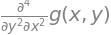

In [38]:
g.diff(x,y,x,y)

In [39]:
#para una expresión de x, por ejemplo
modelo=2*sympy.exp(-2*b*t)+3*t*sympy.exp(-b*t)
modelo

In [40]:
sympy.diff(modelo,t)

In [41]:
modelo.diff(b)

#### integrales

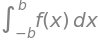

In [42]:
#definamos una función abstracta
f=sympy.Function('f')(x)
#calculemos su derivada
sympy.integrate(f,(x,-b,b))

In [43]:
#podemos buscar la integral de una función definida
sympy.integrate(sympy.sin(x))

In [44]:
sympy.integrate(sympy.sin(x)*sympy.exp(-x),(x,0,oo))

In [45]:
integrando=sympy.sin(x)*sympy.exp(-x)
integrando

In [46]:
integrando.integrate((x,0,oo))

#### Integrales y derivadas postergadas

In [47]:
#se define una expresión simbólica
f=3*x**2+5*x+4
f

In [48]:
#indicamos la derivada
df=sympy.Derivative(f,x)
df

In [49]:
#indicamos la integral
af=sympy.Integral(f,x)
af

In [50]:
#evaluamos la derivada
df.doit()

In [51]:
af.doit()

#### Límites

In [52]:
#Se define una función exponencial para calcular el límite
argumento=sympy.exp(-b*t)
argumento

In [53]:
sympy.limit(argumento,t,oo)

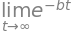

In [54]:
#se pudo hacer con la derivada indicada y no evaluada
L=sympy.Limit(argumento,t,oo)
L

In [55]:
L.doit()

### Series, sumas y productos

In [56]:
sympy.summation(argumento,(t,0,10))


In [57]:
sympy.product(argumento,(t,0,10))

### Transformada de Laplace y de Fourier
Se calcula transformada de laplace y de Fourier de dos funciones

In [58]:
argumento

In [59]:
#es necesario definir la variable compleja z, s y W
s,z,w=sympy.symbols("s,z,w",complex=True)
sympy.laplace_transform(argumento,t,s)

⎛  1            ⎞
⎜─────, -b, True⎟
⎝b + s          ⎠

In [60]:
argumento2=sympy.exp(-t**2)
argumento2

In [61]:
sympy.fourier_transform(argumento2,t,w)

### Ecuaciones y sistemas de ecuaciones


In [62]:
#Resolver analíticamente una ecuación cuadrática
ecuacion_cuadratica=x**2+4*b*x+3
ecuacion_cuadratica

In [63]:
solucion=sympy.solve(ecuacion_cuadratica,x,dict=True)

In [64]:
solucion

In [65]:
ecuacion_cuadratica.subs(x,solucion[1][x]).simplify()

In [66]:
#Resolver un sistema de ecuaciones
ecuacion1=3*x+4*y+1
ecuacion2=5*x+2*y-2
print(ecuacion1)
print(ecuacion2)

3*x + 4*y + 1
5*x + 2*y - 2


In [67]:
solsistema=sympy.solve([ecuacion1,ecuacion2],(x,y),dict=False)

In [68]:
solsistema

In [69]:
ecuacion2.subs(solsistema)

## graficación en Sympy

In [70]:
x=sympy.symbols('x')

In [71]:
y=x*x
z=x*x+3
w=(x-1)**2

In [72]:
y

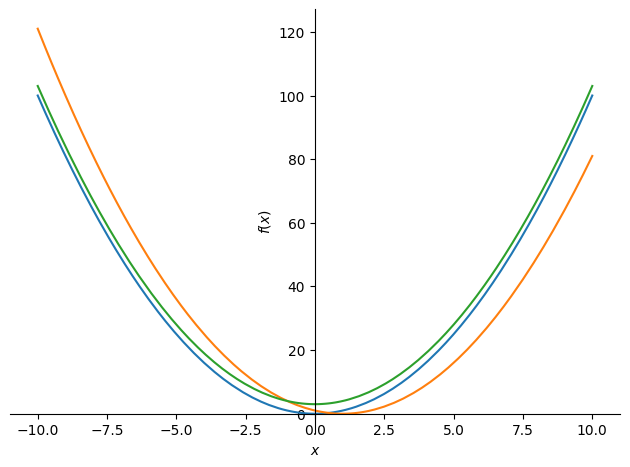

In [73]:
sympy.plot(y,w,z)

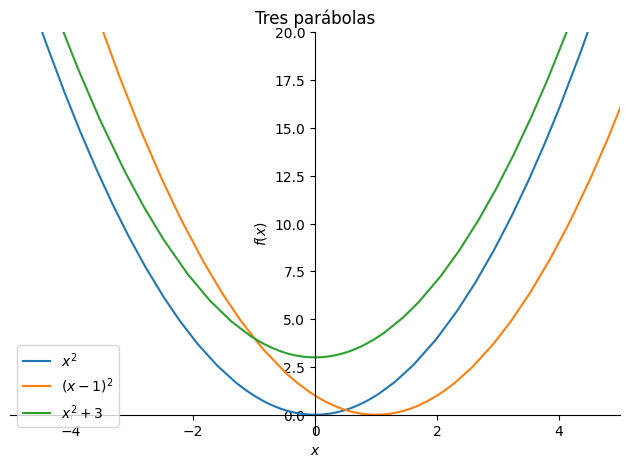

In [74]:
#Pudimos haber personalizado la gráfica
sympy.plot(y,w,z, xlim=[-5,5],ylim=[-1,20],title="Tres parábolas",legend=True)